In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy.stats as sts

Задание 1
Загрузить данные из файла “insurance.csv”

In [3]:
data = pd.read_csv('./insurance.csv', sep=',')

Задание 2
С помощью метода describe() посмотреть статистику по данным

In [4]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Задание 3
Построить гистограммы для числовых показателей

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'children'}>,
        <AxesSubplot: title={'center': 'charges'}>]], dtype=object)

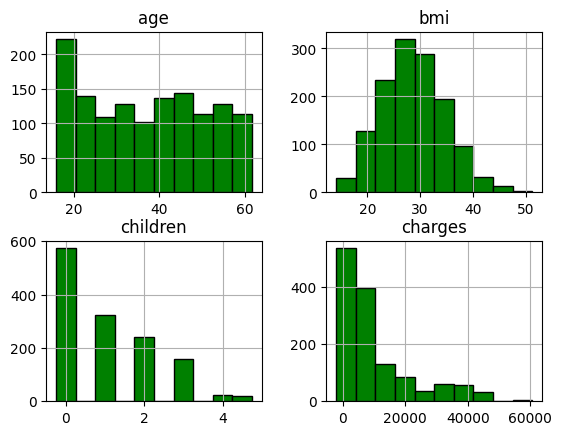

In [5]:
data.hist(color='green', edgecolor='black', align="left")

Задание 4
Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges)
Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии)
Добавить легенду на графики

BMI 
среднее: 30.66, мода: 32.3, медиана: 30.4


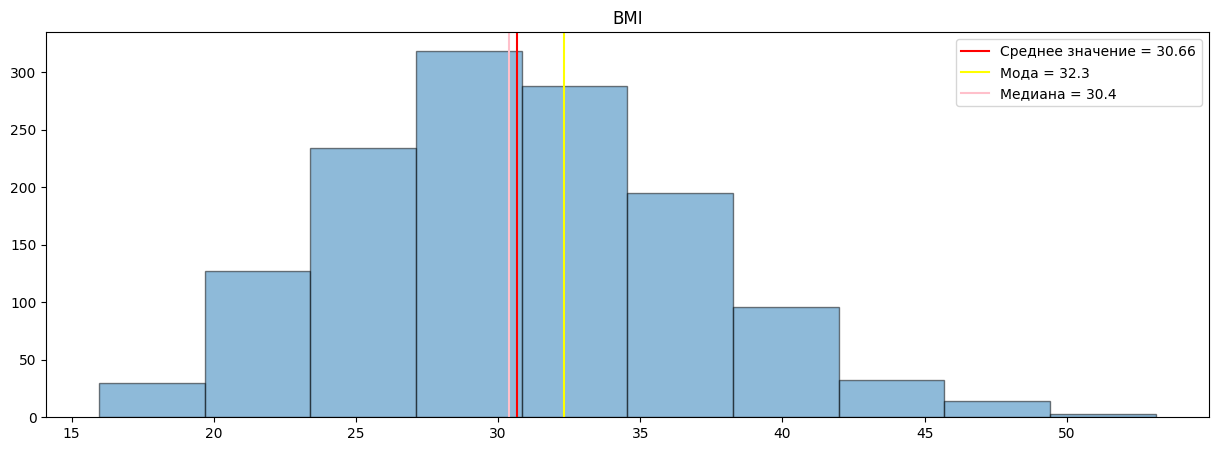

In [6]:
bmi_mean = np.mean(data['bmi']).round(2)
bmi_moda = data['bmi'].mode().values[0]
bmi_med = np.median(data['bmi'])

charges_mean = np.mean(data['charges']).round(2)
charges_moda = data['charges'].values[0]
charges_med = np.median(data['charges'])

print(f'BMI \nсреднее: {bmi_mean}, мода: {bmi_moda}, медиана: {bmi_med}')

plt.figure(figsize=(15, 5))
values, bins, bars = plt.hist(data['bmi'], edgecolor='black', alpha=0.5)
plt.title('BMI')
plt.axvline(x=bmi_mean, color='red', label=f'Среднее значение = {bmi_mean}')
plt.axvline(x=bmi_moda, color='yellow', label=f'Мода = {bmi_moda}')
plt.axvline(x=bmi_med, color='pink', label=f'Медиана = {bmi_med}')
plt.legend()
plt.show()

Charges
среднее: 13270.42, мода: 16884.924, медиана: 9382.033


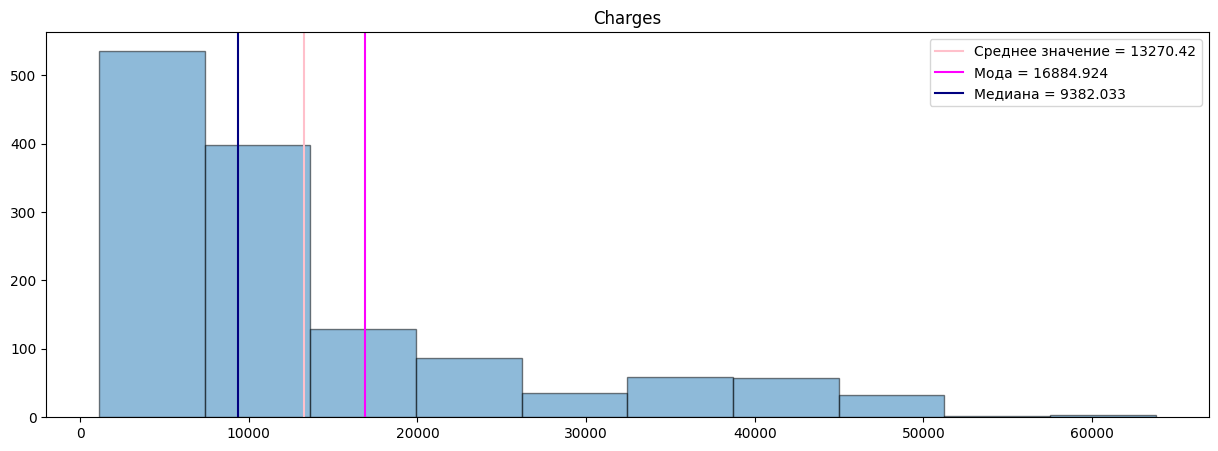

In [7]:
print(
    f'Charges\nсреднее: {charges_mean}, мода: {charges_moda}, медиана: {charges_med}'
)
plt.figure(figsize=(15, 5))
values, bins, bars = plt.hist(data['charges'], edgecolor='black', alpha=0.5)
plt.title('Charges')
plt.axvline(x=charges_mean, color='pink', label=f'Среднее значение = {charges_mean}')
plt.axvline(x=charges_moda, color='magenta', label=f'Мода = {charges_moda}')
plt.axvline(x=charges_med, color='navy', label=f'Медиана = {charges_med}')
plt.legend()
plt.show()

Задание 5
Построить box-plot для числовых показателей
Названия графиков должны соответствовать названиям признаков

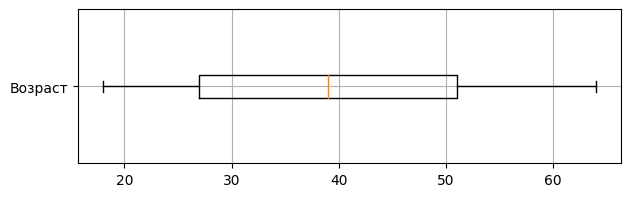

In [8]:
plt.figure(figsize=(7, 2))
plt.boxplot([data['age']], labels=['Возраст'], vert=False)
plt.grid()
plt.show()

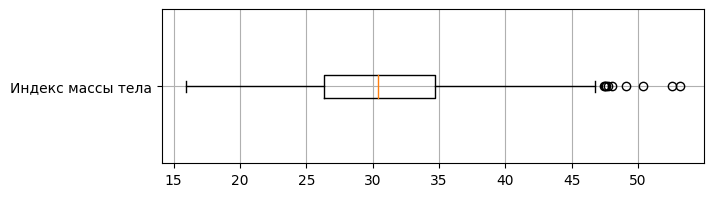

In [9]:
plt.figure(figsize=(7, 2))
plt.boxplot([data['bmi']], labels=['Индекс массы тела'], vert=False)
plt.grid()
plt.show()

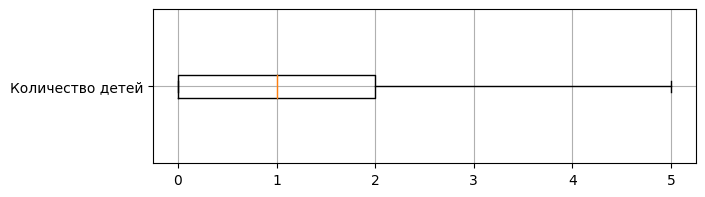

In [10]:
plt.figure(figsize=(7, 2))
plt.boxplot([data['children']], labels=['Количество детей'], vert=False)
plt.grid()
plt.show()

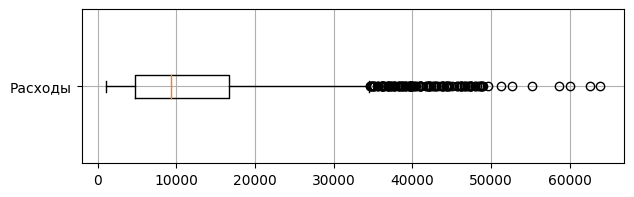

In [11]:
plt.figure(figsize=(7, 2))
plt.boxplot([data['charges']], labels=['Расходы'], vert=False)
plt.grid()
plt.show()

Задание 6
Используя признак charges или imb, проверить, выполняется ли центральная предельная теорема
Использовать различные длины выборок n. Количество выборок = 300. Вывести результат в виде гистограмм
Найти стандартное отклонение и среднее для полученных распределений

Размер выборки: 10(0.75%) 
Среднее: 30.65 
Стандартное отклонение: 1.837272867639396


<Figure size 1800x500 with 0 Axes>

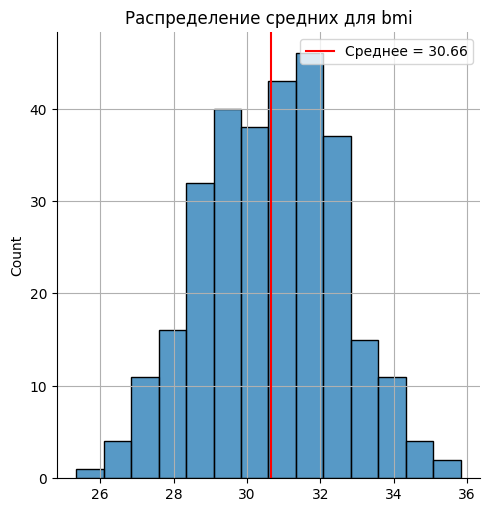

Размер выборки: 100(7.47%) 
Среднее: 30.62 
Стандартное отклонение: 0.5454075660521883


<Figure size 1800x500 with 0 Axes>

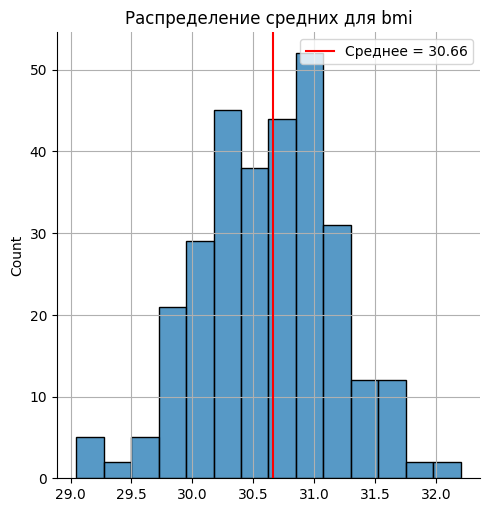

Размер выборки: 250(18.68%) 
Среднее: 30.68 
Стандартное отклонение: 0.33966444458988576


<Figure size 1800x500 with 0 Axes>

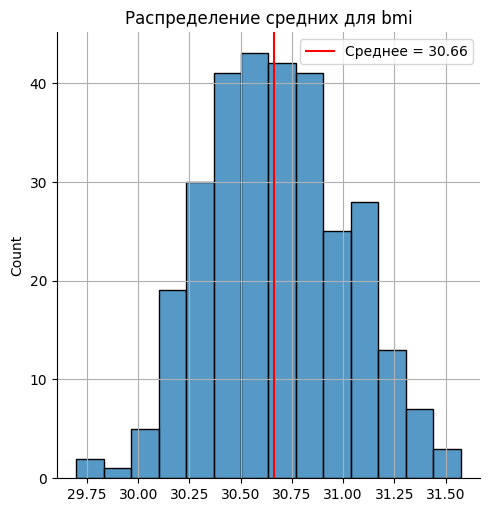

Размер выборки: 500(37.37%) 
Среднее: 30.66 
Стандартное отклонение: 0.22761009804838558


<Figure size 1800x500 with 0 Axes>

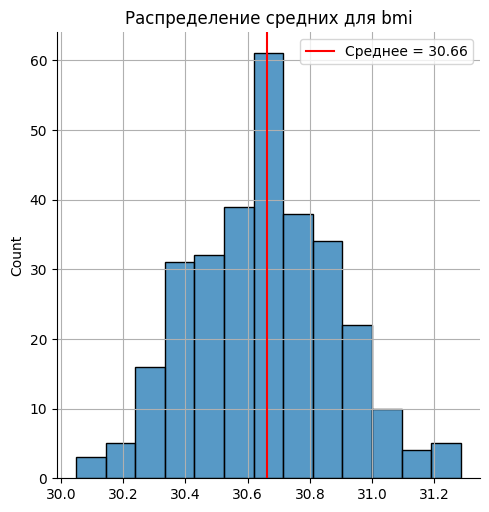

Размер выборки: 1000(74.74%) 
Среднее: 30.66 
Стандартное отклонение: 0.08968030637035558


<Figure size 1800x500 with 0 Axes>

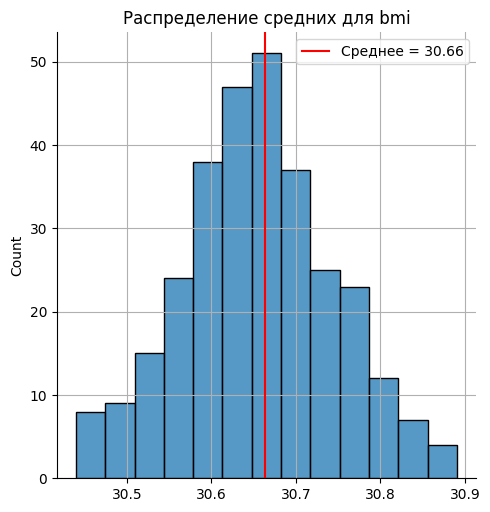

In [12]:
number_of_samples = 300


def plot_clt(df, n, column):
    for sample_size in n:
        means_list = list()
        for i in np.arange(number_of_samples):
            means_list.append(df[column].sample(sample_size).mean())

        mean = np.mean(means_list)
        std = np.std(means_list)

        plt.figure(figsize=(18, 5))
        sns.displot(means_list)
        plt.axvline(df[column].mean(), label=f'Среднее = {df[column].mean().round(2)}', color='red')
        plt.grid(True)
        print(
            f'Размер выборки: {sample_size}({round(100 * sample_size / len(df), 2)}%) \nСреднее: {mean.round(2)} \nСтандартное отклонение: {std}')
        plt.title(f'Распределение средних для {column}')
        plt.legend(loc="upper right")
        plt.show()


plot_clt(data, [10, 100, 250, 500, 1000], "bmi")

Задание 7
Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела.

In [13]:
def print_mean_trust_interval(values, trust_level):
    trust = {
        0.95: 1.96,
        0.99: 2.58,
    }
    print(
        f"Доверительный интервал, основанный на нормальном распределении, для столбца {values.name} с коэффициентом доверия {trust_level}:")
    se = values.std() / np.sqrt(len(values))
    mean = values.mean()
    print(
        f'[{(mean - trust[trust_level] * se).round(2)},{(mean + trust[trust_level] * se).round(2)}]'
    )
    print('-' * 100)


print_mean_trust_interval(data["charges"], 0.95)
print_mean_trust_interval(data["charges"], 0.99)
print_mean_trust_interval(data["bmi"], 0.95)
print_mean_trust_interval(data["bmi"], 0.99)

Доверительный интервал, основанный на нормальном распределении, для столбца charges с коэффициентом доверия 0.95:
[12621.53,13919.31]
----------------------------------------------------------------------------------------------------
Доверительный интервал, основанный на нормальном распределении, для столбца charges с коэффициентом доверия 0.99:
[12416.27,14124.58]
----------------------------------------------------------------------------------------------------
Доверительный интервал, основанный на нормальном распределении, для столбца bmi с коэффициентом доверия 0.95:
[30.34,30.99]
----------------------------------------------------------------------------------------------------
Доверительный интервал, основанный на нормальном распределении, для столбца bmi с коэффициентом доверия 0.99:
[30.23,31.09]
----------------------------------------------------------------------------------------------------


Задание 8
Проверить распределения следующих признаков на нормальность:
индекс массы тела, расходы. Сформулировать нулевую и
альтернативную гипотезы. Для каждого признака использовать KS-тест
и q-q plot. Сделать выводы на основе полученных p-значений.

Проверка нормальности распределения признака bmi
----------------------------------------------------------------------------------------------------
Проверка с помощью Q-Q plot


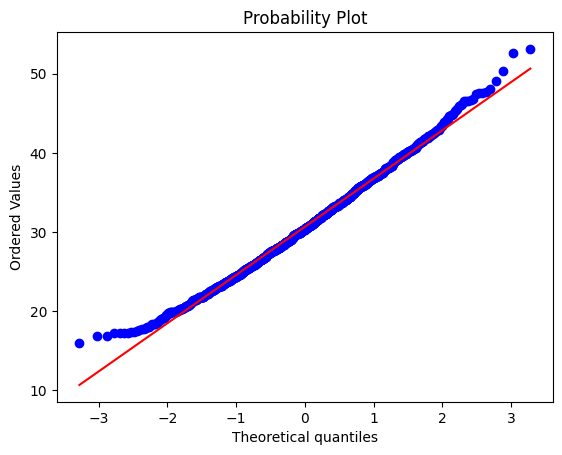

----------------------------------------------------------------------------------------------------
Проверка с помощью KS-теста
KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394)
----------------------------------------------------------------------------------------------------

Проверка нормальности распределения признака charges
----------------------------------------------------------------------------------------------------
Проверка с помощью Q-Q plot


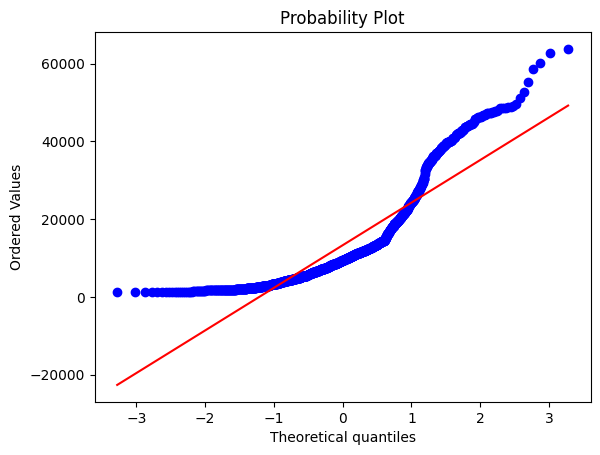

----------------------------------------------------------------------------------------------------
Проверка с помощью KS-теста
KstestResult(statistic=0.18846204110424236, pvalue=4.393057307685022e-42)
----------------------------------------------------------------------------------------------------



In [14]:
def check_normality(df, column):
    print(f'Проверка нормальности распределения признака {column}')
    print('-' * 100)
    print('Проверка с помощью Q-Q plot')
    sts.probplot(df[column], dist="norm", plot=plt)
    plt.show()
    print('-' * 100)
    print('Проверка с помощью KS-теста')
    print(sts.kstest(sts.zscore(df[column]), 'norm'))
    print('-' * 100)
    print()


check_normality(data, 'bmi')
check_normality(data, 'charges')